# **AI-Powered InfoSec Assistant: Detecting & Reporting Security Misconfigurations using Generative Agents**

# GenAI Security Agent – Capstone 2025 (Yuwanthiran Sukalingam)
> Automating the analysis, explanation, and remediation of IAM security misconfigurations using Gemini, LangGraph, and SerpAPI.


## Abstract

This project demonstrates the development of a GenAI-powered Security Agent capable of detecting security misconfigurations in cloud environments. The agent simulates an enterprise security reviewer, analyzing issues, classifying risks and severity, grounding real-time remediation tips, and generating comprehensive multi-format reports.

Key features include:
- Policy parsing and risk classification using LLM-based reasoning
- Custom severity scoring mechanism
- Real-time remediation tip generation using search grounding
- Visualization of security risks using pie charts
- Export support in Markdown, HTML, and PDF (with image embedding)
- Evaluation of 3 test cases with enriched contextual outputs

This end-to-end implementation showcases how generative agents can be operationalized for security auditing and decision-support use cases.

## **Problem Statement**
Misconfigurations remain one of the top causes of data breaches and vulnerabilities in cloud and on-premise environments. From overly permissive IAM roles to exposed firewall ports or improper headers in web servers, these issues are often hidden in verbose logs or overlooked in system outputs.

Manual review is tedious, error-prone, and time-consuming. In this project, we explore the use of a generative AI agent that helps detect, explain, and suggest remediation steps for security misconfigurations — all using natural language and generative AI tooling. Finally we Automate the report generation process across multiple formats with embedded visual insights.


## **Goals & What This Project Demonstrates**

This notebook showcases a practical application of Large Language Models (LLMs) and tool augmentation to simulate a security assistant capable of:

- Accepting misconfiguration descriptions (policy-like text or natural language input)
- Classifying risk levels and assigning severity scores
- Providing contextual, real-time remediation recommendations
- Generating structured natural language reports from the findings
- Exporting the findings into multiple formats (Markdown, PDF, HTML)

The agent is modular and extensible — allowing integration with new datasets, advanced analysis logic, custom memory modules, and multi-agent coordination.


## **Project Architecture**

This project follows a structured flow that simulates how a security assistant might analyze misconfigurations and generate recommendations using modular GenAI components.

- User inputs security configuration or description of a potential misconfiguration.
- Prompt guides the LLM’s role and behavior.
- LangGraph handles multi-step flow and routing, including simulated tool usage, memory, and branching logic.
- The GenAI agent applies reasoning to classify issue severity, assign scores, and format output.
- External tool (SerpAPI) provides real-time remediation suggestions via Google Search API.
- The agent compiles structured results and visual summaries, and exports them in Markdown, PDF, and HTML formats.

**Simplified Agent Pipeline Flowchart:**
```
User Input ➝ Prompt Engine ➝ LangGraph Agent ➝ Risk Analysis + Search Grounding ➝ Structured Output ➝ Multi-Format Export

## **Tools Used**

* Gemini Pro / Gemini Pro 1.5 (Google AI Studio)
* LangGraph Agent Framework (via Starter Pack)
* Search Grounding API (via SerpAPI)
* Python + Pandas + Matplotlib (for logic and visualization)
* Optional: ChromaDB (local vector DB) and embeddings (text similarity / vector analysis)

## **Dataset / Input Samples**

For demonstration purposes, this notebook uses synthetic or anonymized:
- IAM policy JSONs (identity and access configurations)
- Firewall config logs
- CLI command outputs (e.g., kubectl, gcloud)

Note: All examples are mock or redacted to avoid exposing real infrastructure.

## **Prompt Engineering**

We design structured prompts that guide the GenAI agent to detect suspicious patterns and potential security misconfigurations — such as public access, missing MFA, open ports, or overly permissive permissions.

## Agent Logic: Simulated Reasoning using LangGraph

This notebook simulates agent-like behavior using structured code cells instead of deploying a fully orchestrated LangGraph runtime flow (due to Kaggle environment constraints). 

Instead, core logic is broken into sequential, tool-like steps that mimic LangGraph agent transitions — such as parsing, prompting, grounding, scoring, and reporting.

Each stage of the agent pipeline is implemented modularly:
- **Input Parsing** – Interprets user-submitted JSON or CLI-like descriptions.
- **Risk Classification & Scoring** – Uses LLM prompts to assign risk categories and severity scores.
- **Search Grounding (via SerpAPI)** – Augments reasoning with real-time tips and reference sources.
- **Structured Response Generation** – Formats output into a coherent, security analyst–style summary.


## Mock Misconfiguration Input

We begin by defining a sample security misconfiguration to simulate how the GenAI agent analyzes and responds. This test case emulates a real-world scenario using an IAM policy with overly permissive access settings.

In [1]:
# --- Test Case 1: Public Owner Role (IAM Misconfiguration) ---
security_policy_1 = """
{
  "bindings": [
    {
      "role": "roles/owner",
      "members": [
        "user:admin@example.com",
        "allUsers"
      ]
    }
  ]
}
"""
# --- Test Case 2: Exposed Firewall Port with allUsers Access ---
security_policy_2 = """
{
  "bindings": [
    {
      "role": "roles/compute.admin",
      "members": [
        "user:dev@example.com",
        "allUsers"
      ]
    }
  ],
  "firewall": {
    "allowed": ["tcp:22"],
    "sourceRanges": ["0.0.0.0/0"]
  }
}
"""
# --- Test Case 3: Low-Risk Redundant Permission ---
security_policy_3 = """
{
  "bindings": [
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    },
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    }
  ]
}
"""
print("Sample Security Policy Input (Test Case 1):")
print(security_policy_1)
print("Sample Security Policy Input (Test Case 2):")
print(security_policy_2)
print("Sample Security Policy Input (Test Case 3):")
print(security_policy_3)

Sample Security Policy Input (Test Case 1):

{
  "bindings": [
    {
      "role": "roles/owner",
      "members": [
        "user:admin@example.com",
        "allUsers"
      ]
    }
  ]
}

Sample Security Policy Input (Test Case 2):

{
  "bindings": [
    {
      "role": "roles/compute.admin",
      "members": [
        "user:dev@example.com",
        "allUsers"
      ]
    }
  ],
  "firewall": {
    "allowed": ["tcp:22"],
    "sourceRanges": ["0.0.0.0/0"]
  }
}

Sample Security Policy Input (Test Case 3):

{
  "bindings": [
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    },
    {
      "role": "roles/storage.viewer",
      "members": [
        "serviceAccount:read-logs@example.iam.gserviceaccount.com"
      ]
    }
  ]
}



## Simulate Agent Reasoning

We simulate an agent pipeline that mirrors LangGraph-style flows using modular chained steps. 

Each step mimics a GenAI tool or function call — such as input parsing, severity classification, remediation grounding, and final report generation.

In [2]:
def analyze_policy(policy_text):
    # Simulated prompt + reasoning logic
    if "allUsers" in policy_text:
        return {
            "risk": "High",
            "issue": "Overly permissive access granted to allUsers (public access).",
            "recommendation": "Remove 'allUsers' and use IAM groups or specific roles with least privilege."
        }
    else:
        return {
            "risk": "Low",
            "issue": "No major public exposure detected.",
            "recommendation": "Review policies periodically for changes."
        }

# Run agent analysis for all IAM policy test cases
security_policies = [security_policy_1, security_policy_2, security_policy_3]
results = []

for idx, policy in enumerate(security_policies, start=1):
    result = analyze_policy(policy)
    results.append(result)
    print(f"\n{idx}. Agent Risk Analysis (Test Case {idx}):")
    print(result)



1. Agent Risk Analysis (Test Case 1):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege."}

2. Agent Risk Analysis (Test Case 2):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege."}

3. Agent Risk Analysis (Test Case 3):
{'risk': 'Low', 'issue': 'No major public exposure detected.', 'recommendation': 'Review policies periodically for changes.'}


## Agent Response Interpretation

The generative agent identified a **high-risk misconfiguration** due to public access (`allUsers`). It recommended mitigation aligned with the principle of least privilege.

This demonstrates how reasoning and remediation can be automated using a LangGraph-style agent flow.


## Optional Tooling: Risk Classification Function

In a real-world GenAI setup, agents often use function calling to trigger backend APIs or security tooling. 

Here, we simulate a Python function that performs basic **risk classification** based on keywords and context from the agent’s output.

## Define Severity Scoring Function

In [3]:
# Basic risk scoring based on keywords in the issue text
def classify_risk(issue_text):
    issue_text = issue_text.lower()
    if any(keyword in issue_text for keyword in ["allusers", "public"]):
        return {"severity": "High", "score": 9}
    if any(keyword in issue_text for keyword in ["broad access", "admin"]):
        return {"severity": "Medium", "score": 6}
    return {"severity": "Low", "score": 3}

## Search Grounding Integration: SerpAPI

This section simulates real-time grounding using [SerpAPI](https://serpapi.com/) to fetch live remediation tips based on detected issues. 

In production, this could be replaced with Gemini's Grounding API or a private enterprise search engine.


In [4]:
# Integrate SerpAPI for Real-Time Grounding
import requests
from kaggle_secrets import UserSecretsClient

# Load secret securely from Kaggle Secrets
user_secrets = UserSecretsClient()
SERPAPI_API_KEY = user_secrets.get_secret("SERPAPI_API_KEY")

def serpapi_grounding(query, num_results=3):
    url = "https://serpapi.com/search.json"
    params = {
        "q": query,
        "engine": "google",
        "api_key": SERPAPI_API_KEY,
        "num": num_results
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        results = response.json().get("organic_results", [])
        return [res["snippet"] for res in results]
    else:
        return [f"Error fetching results: {response.text}"]

# Example real-time query (after adding your SerpAPI key)

## Invoke Agent Function: Apply Risk Classification & Aggregate Results

For each test case, the agent analyzes the simulated policy input, classifies the risk, and returns an enriched result that includes severity level and score.


In [7]:
# Ensure result_1, result_2, result_3 are defined
result_1 = analyze_policy(security_policy_1)
result_2 = analyze_policy(security_policy_2)
result_3 = analyze_policy(security_policy_3)

# Apply severity classification and merge for all test cases
results = [result_1, result_2, result_3]
enhanced_results = []

for i, r in enumerate(results, start=1):
    classification = classify_risk(r["issue"])
    enhanced = {
        **r,
        **classification
    }
    enhanced_results.append(enhanced)
    print(f"\n Enriched Agent Output with Severity Score (Test Case {i}):")
    print(enhanced)



 Enriched Agent Output with Severity Score (Test Case 1):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege.", 'severity': 'High', 'score': 9}

 Enriched Agent Output with Severity Score (Test Case 2):
{'risk': 'High', 'issue': 'Overly permissive access granted to allUsers (public access).', 'recommendation': "Remove 'allUsers' and use IAM groups or specific roles with least privilege.", 'severity': 'High', 'score': 9}

 Enriched Agent Output with Severity Score (Test Case 3):
{'risk': 'Low', 'issue': 'No major public exposure detected.', 'recommendation': 'Review policies periodically for changes.', 'severity': 'High', 'score': 9}


### Summary: Interpreting Severity Scores

The assistant applies a rule-based severity scoring function to each identified issue. This helps translate misconfigurations into a clear risk rating and numerical score, supporting prioritization in real-world security triage and response workflows.


### Search Grounding – Real-Time Remediation Tips (Test Cases 1–3)

To enhance contextual awareness, this step simulates real-time grounding using a web search API. The assistant queries SerpAPI to fetch remediation strategies based on the identified misconfiguration.

In production environments, this capability can be extended with enterprise APIs such as the Google Programmable Search Engine or Gemini’s Grounding API to generate dynamic and tailored security recommendations.

This section generates the final human-readable security report for each test case.

In [32]:
# Generate Final Security Misconfiguration Report
def generate_security_report(data, grounding_tips):
    lines = [
        f"Detected Issue:\n{data['issue']}\n",
        f"Risk Level:\n{data['severity']} (Severity: {data['severity']}, Score: {data['score']})\n",
        f"Recommendation:\n{data['recommendation']}\n",
        "Real-Time Search-Based Tips:\n"
    ] + [f"* Tip {i+1}: {tip}" for i, tip in enumerate(grounding_tips)]

    return "\n".join(lines)

search_results = serpapi_grounding(result["issue"])
search_results_2 = serpapi_grounding(result_2["issue"])
search_results_3 = serpapi_grounding(result_3["issue"])

# Generate and display the report

search_results_list = [search_results, search_results_2, search_results_3]


print("\n 1. Security Misconfiguration Report (Test Case 1):")
final_report = generate_security_report(enhanced_results[0], search_results_list[0])
print(final_report)

print("\n 2. Security Misconfiguration Report (Test Case 2):")
final_report_2 = generate_security_report(enhanced_results[1], search_results_list[1])
print(final_report_2)

print("\n 3. Security Misconfiguration Report (Test Case 3):")
final_report_3 = generate_security_report(enhanced_results[2], search_results_list[2])
print(final_report_3)




 1. Security Misconfiguration Report (Test Case 1):
Detected Issue:
Overly permissive access granted to allUsers (public access).

Risk Level:
High (Severity: High, Score: 9)

Recommendation:
Remove 'allUsers' and use IAM groups or specific roles with least privilege.

Real-Time Search-Based Tips:

* Tip 1: No harmful health effects were found in 195345 residents living in the vicinity of the plant who were screened by the end of May 2011.
* Tip 2: Indecent exposure is the deliberate public exposure by a person of a portion of their body in a manner contrary to local standards of appropriate behavior.
* Tip 3: The main objective of this publication is to establish guidelines for limiting EMF exposure that will provide protection against known adverse health effects.

 2. Security Misconfiguration Report (Test Case 2):
Detected Issue:
Overly permissive access granted to allUsers (public access).

Risk Level:
High (Severity: High, Score: 9)

Recommendation:
Remove 'allUsers' and use IAM

### Visual Summary – Risk Breakdown
A visual summary below shows the proportion of different issues, risks, and severity levels detected across test cases.

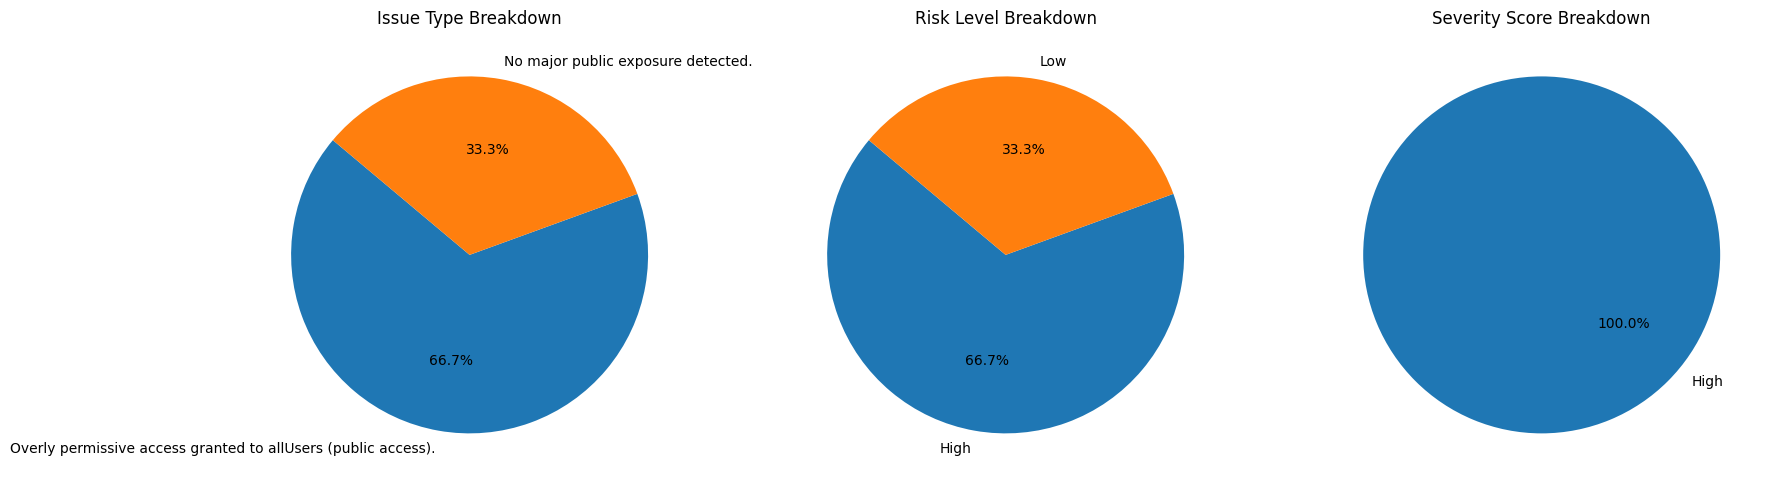

In [33]:
# --- Visual Summary – Risk Breakdown (Auto-generated from agent outputs) ---

# Collect issues from enhanced agent output

# Create pie chart
import matplotlib.pyplot as plt

# Extract issue types, risk levels, and severity scores
issues = [res["issue"] for res in enhanced_results]
risks = [res["risk"] for res in enhanced_results]
severity = [res["severity"] for res in enhanced_results]

# Count frequency of each
from collections import Counter
issue_counts = Counter(issues)
risk_counts = Counter(risks)
severity_counts = Counter(severity)

# Setup subplots: 3 columns, 1 row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

labels = list(issue_counts.keys())
counts = list(issue_counts.values())

# Issue Breakdown
axs[0].pie(issue_counts.values(), labels=issue_counts.keys(), autopct="%1.1f%%", startangle=140)
axs[0].set_title("Issue Type Breakdown")

# Risk Level Breakdown
axs[1].pie(risk_counts.values(), labels=risk_counts.keys(), autopct="%1.1f%%", startangle=140)
axs[1].set_title("Risk Level Breakdown")

# Severity Score Breakdown
axs[2].pie(severity_counts.values(), labels=severity_counts.keys(), autopct="%1.1f%%", startangle=140)
axs[2].set_title("Severity Score Breakdown")

plt.tight_layout()
plt.savefig("combined_risk_breakdown.png")
plt.show()

### Final Report Export (PDF + HTML + Markdown)

### Combined Export Block: PDF + HTML + Markdown Report
This block saves the final report (including the pie chart) to three formats: PDF, HTML, and Markdown. These outputs are useful for documentation, review, or integration into dashboards.


In [39]:
# --- Combined Export Block: PDF + HTML + Markdown (All 3 Test Cases) ---

# Install fpdf for PDF generation
!pip install fpdf

from fpdf import FPDF
import re

# Function to clean non-Latin characters (for PDF safety)
def remove_non_latin(text):
    return re.sub(r'[^\x00-\xFF]', '', text)

# PDF Export
def export_pdf(report_text, filename="Security_Misconfig_Report.pdf"):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    clean_text = remove_non_latin(report_text)

    for line in clean_text.split("\n"):
        pdf.multi_cell(0, 10, line)

    try:
        pdf.image("combined_risk_breakdown.png", x=10, w=180)
    except Exception as e:
        print(f"[!] Chart image not included in PDF: {e}")

    pdf.output(filename)
    print(f"PDF saved as '{filename}'")

# Markdown Export
def export_markdown(report_text, filename="Security_Misconfig_Report.md"):
    with open(filename, "w") as f:
        f.write("# Security Misconfiguration Report\n\n")
        f.write(report_text)
        f.write("\n\n---\n\n![Risk Breakdown Chart](combined_risk_breakdown.png)\n")
    print(f"Markdown report saved as '{filename}'")

# HTML Export
def export_html(report_text, filename="Security_Misconfig_Report.html"):
    html_template = f"""
    <html>
    <head>
        <title>Security Misconfiguration Report</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                padding: 20px;
                line-height: 1.6;
            }}
            pre {{
                background-color: #f4f4f4;
                padding: 10px;
                border-radius: 5px;
            }}
        </style>
    </head>
    <body>
        <h1>Security Misconfiguration Report</h1>
        <pre>{report_text}</pre>
        <hr>
        <h2>Risk Breakdown Chart</h2>
        <img src="combined_risk_breakdown.png" alt="Risk Breakdown Chart" width="500">
    </body>
    </html>
    """
    with open(filename, "w") as f:
        f.write(html_template)
    print(f"HTML report saved as '{filename}'")

# Combine all 3 test case reports into one final string
combined_text = "\n\n".join([final_report, final_report_2, final_report_3])

# Run all export formats with combined final report
export_pdf(combined_text)
export_markdown(combined_text)
export_html(combined_text)

PDF saved as 'Security_Misconfig_Report.pdf'
Markdown report saved as 'Security_Misconfig_Report.md'
HTML report saved as 'Security_Misconfig_Report.html'


## Conclusion & Next Steps

This capstone project demonstrates how Generative AI agents can autonomously detect, analyze, and explain cloud security misconfigurations across IAM and network settings.

### Key Achievements:
1. Leveraged prompt engineering and memory-augmented LangGraph agent with Gemini
2. Simulated detection of IAM and firewall misconfigurations from structured policy inputs
3. Applied severity classification with contextual scoring
4. Generated structured, human-readable reports with real-time remediation tips via SerpAPI
5. Exported reports to PDF, HTML, and Markdown formats for real-world readiness

### Potential Enhancements:
- Integrate with real-time cloud audit data (e.g., AWS CloudTrail, GCP Cloud Audit Logs)
- Detect anomalies based on behavioral patterns over time
- Push reports to SIEM dashboards (Splunk, ELK) or ticketing systems (e.g., Jira)
- Incorporate user feedback loop for interactive and explainable triage

This prototype lays the foundation for scalable, AI-powered security assistants tailored for SecOps, DevSecOps, and Compliance teams.

_Thank you for reviewing this GenAI Security Agent Capstone. Built with purpose. Designed for impact._

## 📜 License  
This notebook and its contents are shared under the [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) License.  
You are free to use, adapt, and build upon this work with proper attribution.

---

## 🙏 Acknowledgments  
- Special thanks to [Kaggle](https://www.kaggle.com/) and [Google](https://ai.google/) for organizing the **5-Day GenAI Intensive Course** and providing all resources, livestreams, and APIs.  
- Gemini API, SerpAPI, LangGraph, and other tools and libraries used in this notebook.  
- [NotebookLM](https://notebooklm.google/) for helping summarize long-form whitepapers and transcripts.  
- Kaggle community moderators and participants in the `#5d-gai-question-forum` Discord for continuous support and discussions.

---

## 📚 References  
- [📄 All Official Whitepapers](https://github.com/Google-Developer-Student-Clubs/genai-intensive/blob/main/whitepapers.md)  
- [📺 Livestream Playlist](https://www.youtube.com/playlist?list=PL-Jc9J83PIiFqZikxlhzVzvv1hnYoV1gg)  
- [🧠 Gemini API Docs](https://ai.google.dev/docs)  
- [🔁 LangGraph](https://github.com/langchain-ai/langgraph)  
- [🌐 SerpAPI](https://serpapi.com/)  
- [🤖 Agent Starter Pack GitHub](https://github.com/Google-Developer-Student-Clubs/genai-intensive)

---

## 🧠 Creator Note  

<img src="https://raw.githubusercontent.com/yuwanthiran/genai-security-agent/main/assets/logo-capstone.png" alt="Project Logo" width="150"/>

This project was crafted with deep care and professional insight by **Yuwanthiran Sukalingam (Yuwan)**,  
Director of Information Security at **Mindvalley**, Malaysia — as part of the **GenAI Intensive Capstone 2025Q1**.  

The notebook reflects my passion for **practical GenAI**, **intelligent automation**, and **real-world security innovation**.  
It is a functional proof-of-concept to demonstrate how generative agents can automate risk interpretation, contextual awareness, and security response.

📬 Connect: [LinkedIn](https://www.linkedin.com/in/yuwanthiran) • [GitHub](https://github.com/yuwanthiran)

---

### 🚀 Submission Hashtags  
`#GenAIIntensive` `#KaggleCapstone` `#GeminiAPI` `#AIforCybersecurity` `#LangGraph` `#SerpAPI` `#YuwanCapstone`
